## Global Terrorism Database: Messy Analysis
*Caleb Davis*

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv("data/globalterrorismdb.csv")

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [65]:
## Cleaning Data: this will remove all rows where crit1, crit2, and crit3 are not true.
## This gives us a stricter definition of a terrorist incident.

crit1Only = df[df["crit1"] == 1]
crit1and2 = crit1Only[crit1Only["crit2"] == 1]
critsOnly = crit1and2[crit1and2["crit3"] == 1]

In [76]:
## Cleaning Data: this will remove columns that we will not use, making the data easier to work with
def cutDF(data):
    wantedCols = ['eventid','iyear','imonth','iday','extended','country_txt','region_txt','city','multiple','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','corp1','target1','natlty1_txt','gname','motive','individual','nperps','nperpcap','claimed','weaptype1_txt','weaptype2_txt','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','property','propextent','propvalue','ishostkid','nhostkid','nhours','ndays','ransom','ransomamt','ransompaid','hostkidoutcome_txt','nreleased','INT_LOG','INT_IDEO','INT_MISC','INT_ANY']
    return data[wantedCols]

cleaned = cutDF(critsOnly)

In [44]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 207.2+ MB


In [75]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171302 entries, 0 to 201182
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             171302 non-null  int64  
 1   iyear               171302 non-null  int64  
 2   imonth              171302 non-null  int64  
 3   iday                171302 non-null  int64  
 4   extended            171302 non-null  int64  
 5   country_txt         171302 non-null  object 
 6   region_txt          171302 non-null  object 
 7   city                170890 non-null  object 
 8   multiple            171302 non-null  int64  
 9   success             171302 non-null  int64  
 10  suicide             171302 non-null  int64  
 11  attacktype1_txt     171302 non-null  object 
 12  targtype1_txt       171302 non-null  object 
 13  targsubtype1_txt    160099 non-null  object 
 14  corp1               132984 non-null  object 
 15  target1             170693 non-nul

In [17]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.011830e+05,201183.000000,201183.000000,201183.000000,201183.000000,201183.000000,201183.000000,196556.000000,196555.000000,201182.000000,...,1.485000e+03,6.900000e+02,9.070000e+02,678.000000,13185.000000,12595.000000,201183.000000,201183.000000,201183.000000,201183.000000
mean,2.004225e+11,2004.158478,6.451678,15.520983,0.049915,131.448398,7.253600,23.356215,29.784881,1.465409,...,2.862275e+06,3.415798e+05,6.489832e+05,195.564897,4.683656,-31.267646,-4.458930,-4.374699,0.087746,-3.878002
std,1.342944e+09,13.429481,3.387376,8.808477,0.217769,111.919230,2.914629,18.224189,56.602962,0.988601,...,2.871566e+07,5.162443e+06,9.414912e+06,2654.872863,2.035030,64.515177,4.543925,4.640540,0.545811,4.682635
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992022e+11,1992.000000,4.000000,8.000000,0.000000,75.000000,6.000000,11.506724,8.644191,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.011031e+11,2011.000000,6.000000,15.000000,0.000000,101.000000,8.000000,31.250196,43.659053,1.000000,...,1.138790e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,-9.000000,0.000000,0.000000
75%,2.015072e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.558524,68.810806,1.000000,...,3.500000e+05,0.000000e+00,8.882000e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.019123e+11,2019.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
cleaned.describe()

,eventid,iyear,imonth,iday,extended,multiple,success,suicide,individual,nperps,...,nhours,ndays,ransom,ransomamt,ransompaid,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.713020e+05,171302.000000,171302.000000,171302.000000,171302.000000,171302.000000,171302.000000,171302.000000,171302.000000,110126.000000,...,4327.000000,8997.000000,68241.000000,1.379000e+03,8.500000e+02,11690.000000,171302.000000,171302.000000,171302.000000,171302.000000
mean,2.004085e+11,2004.019007,6.452692,15.515557,0.053829,0.150996,0.884006,0.034781,0.003876,-66.547600,...,-52.726196,-35.561521,-0.174367,3.019253e+06,6.751042e+05,-30.788195,-4.668101,-4.594494,0.080735,-4.087658
std,1.331847e+09,13.318613,3.388074,8.808569,0.225680,0.358046,0.320219,0.183224,0.062138,216.495515,...,79.575967,122.324748,1.316803,2.978511e+07,9.719889e+06,65.505122,4.542119,4.631906,0.562047,4.696018
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,...,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992043e+11,1992.000000,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,...,-99.000000,-99.000000,0.000000,0.000000e+00,-9.900000e+01,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.010071e+11,2010.000000,6.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,...,-99.000000,-99.000000,0.000000,1.027454e+04,0.000000e+00,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.015052e+11,2015.000000,9.000000,23.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,...,0.000000,3.000000,0.000000,3.654200e+05,1.003440e+03,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.019123e+11,2019.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25000.000000,...,999.000000,2676.000000,1.000000,1.000000e+09,2.750000e+08,2958.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [78]:
list(cleaned.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country_txt',
 'region_txt',
 'city',
 'multiple',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'motive',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1_txt',
 'weaptype2_txt',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'propextent',
 'propvalue',
 'ishostkid',
 'nhostkid',
 'nhours',
 'ndays',
 'ransom',
 'ransomamt',
 'ransompaid',
 'hostkidoutcome_txt',
 'nreleased',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

**Important Columns**:
* **iyear**: incident year
* **imonth**: incident month
* **iday**: incident day

* **crit1**: if violent act has a/an political, economic, religious, and/or social goal
* **crit2**: if perpetrators had intention to coerce, intimidate, or publicize to larger audience
* **crit3**: if outside international humanitarian law \(not legitimate warfare activites\)

* **country**: numerical code representing country the incident occurred in
* **country_txt**: country as text
* **city**: city incident occurred in

* **attacktype1_txt**: Primary method of attack, based on heirarchy of severity:
    1. Assassination
    2. Hijacking
    3. Kidnapping
    4. Barricade Incident
    5. Bombing/Explosion
    6. Armed Assault
    7. Unarmed Assault
    8. Facility/Infrastructure Attack
    9. Unknown
* **success**: if the *attack* is successful, not based on larger motives/goals
* **suicide**: if the attack was a suicide attack
* **weaptype*N*_txt**: type of weapon used, up to four types recorded for each incident

* **targtype*N*_txt**: string representing the type of target of the attack (ie. government, business, police)
* **targsubtype*N*_txt**: string representing the sub-type of target of the attack
* **corp*N***: name of entity, a string representing the corporate entity or government agency targeted, if applicable
* **target*N***: specific person, building, etc. targeted. If victims known, listed here.
* **natlty*N*_txt**: nationality of target/victim
* **gname**: perpetrator group name, from a standardized list
* **gsubname**: perpetrator sub-group name, any additional information about perpetrator group, such as faction
* **gname*N***: *N* perpetrator group name, when more than one perpetrator is responsible for the incident
* **individual**: indicates if attack was carried out by 1 or more individuals not affiliated with a group
* **nperps**: total number of terrorists participating, from all perpetrator groups.
* **nperpcap**: number of perpetrators taken into custody
* **claimed**: if a group or person claimed responsibility for the attack
* **claimmode_txt**: how the claimants claimed responsibility
* **compclaim**: if there are competing claims of responsibility
* **nkill**: total confirmed fatalities, including victims and attackers
* **nkillus**: total confirmed fatalities of US citizens
* **nkillter**: number of perpetrator fatalities
* **nwound**: total number of non-fatally injured people, including victims and attackers
* **nwoundus**: total number of US citizens non-fatally injured
* **nwoundte**: number of non-fatally injured perpetrators
* **property**: if there was property damage
* **propextent**: extent of property damage as an int:
    1. catastrophic \(more than \\$1 billion)
    2. major \(between \\$1 million and \\$1 billion)
    3. minor \(less than \\$1 million)
    4. Unknown
* **propvalue**: numeric variable  of direct property damage in USD
* **ishostkid**: if there were hostages taken or victims kidnapped, -9 of Unknown
* **nhostkid**: number of hostages tkane or victims kidnapped
* **nhours**: if incident was less than one day, the number of hours hostages/victims were taken is recorded here. -99 if unknown.
* **ndays**: if incident was extended, the number of days hostages/victims were taken is here. -99 if unknown.
* **ransom**: if the incident involved a demand for monetary ransom
* **ransomamt**: numeric amount of ransom demanded, -99 if unknown
* **ransomamtus**: numeric amount of ransom demanded from US sources -99 if unknown
* **ransompaid**: total ransom paid, -99 if unknown
* **ransompaidus**: total ransom paid by US sources, -99 if unknown
* **hostkidoutcome_txt**: If attack type has hostage taking or hijacking, this is the outcome of said event.

* **INT_LOG**: International-Logistical value, based on a comparison between nationality of the perpetrator group and the location of the attack. 1 if attack was logistically international, 0 if logistically domestic, and -9 if unknown
* **INT_IDEO**: International-Ideolical value, based on a comparison between nationality of the perpetrator group and nationality of targets/victims. 1 if attack was ideologically international, 0 if ideologically domestic, -9 if unknown
* **INT_MISC**: International-Miscellaneous value, based on a comparison between location of the attack and nationality of the targets/victims. 1 if attack was misc. international, 0 if misc. domestic, -9 if unknown.
* **INT_ANY**: International-Any of the above, 1 if attack was international on any dimensions \(logistically, ideologically, misc), 0 if attack was domestic on all dimensions, -9 if unknown.

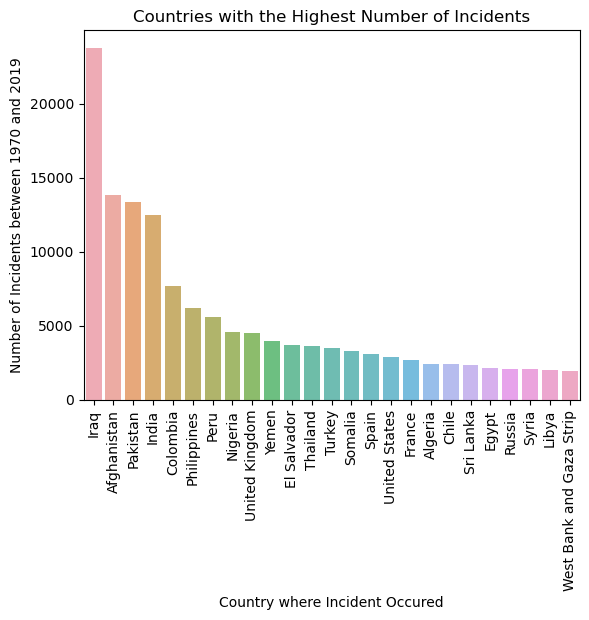

In [79]:
plt.clf()
topCountries = cleaned['country_txt'].value_counts().head(25)
sns.barplot(x = topCountries.index, y = topCountries.values, alpha=.8)
plt.title('Countries with the Highest Number of Incidents')
plt.ylabel("Number of Incidents between 1970 and 2019")
plt.xlabel("Country where Incident Occured")
plt.xticks(rotation=90)
plt.show()

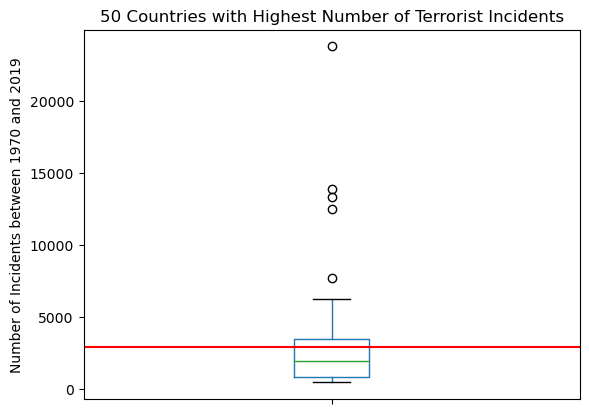

In [80]:
plt.clf()
cleaned['country_txt'].value_counts().head(50).plot(kind = 'box', label="")
plt.axhline(y=topCountries["United States"], color='r', linestyle='-')
plt.title('50 Countries with Highest Number of Terrorist Incidents')
plt.ylabel("Number of Incidents between 1970 and 2019")
plt.show()

## Red line represents United States

In [82]:
UnitedStatesIncidents = cleaned[cleaned['country_txt'] == 'United States']
UnitedStatesIncidents

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,multiple,success,...,ndays,ransom,ransomamt,ransompaid,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
5,197001010002,1970,1,1,0,United States,North America,Cairo,0,1,...,NaN,0.0,NaN,NaN,NaN,NaN,-9,-9,0,-9
7,197001020002,1970,1,2,0,United States,North America,Oakland,0,1,...,NaN,0.0,NaN,NaN,NaN,NaN,-9,-9,0,-9
8,197001020003,1970,1,2,0,United States,North America,Madison,0,1,...,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0,0
9,197001030001,1970,1,3,0,United States,North America,Madison,0,1,...,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0,0
11,197001060001,1970,1,6,0,United States,North America,Denver,0,1,...,NaN,0.0,NaN,NaN,NaN,NaN,-9,-9,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200720,201912100001,2019,12,10,0,United States,North America,Jersey City,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,0,-9
200762,201912110015,2019,12,11,0,United States,North America,Franklin Lakes,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,0,-9
200971,201912220010,2019,12,22,0,United States,North America,Andrews,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,0,-9
201058,201912250028,2019,12,25,0,United States,North America,Cleveland,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,0,-9


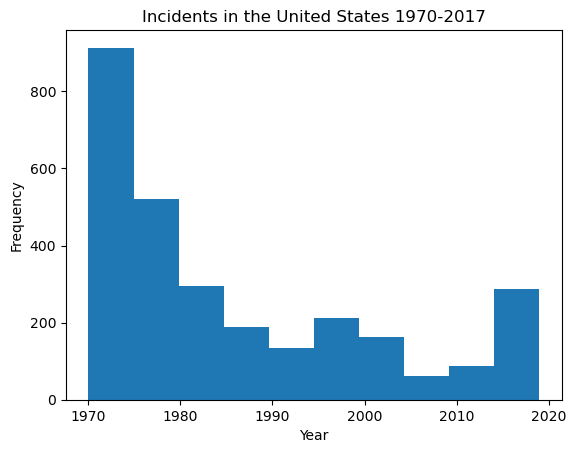

In [87]:
plt.clf()
plt.hist(UnitedStatesIncidents["iyear"], bins=10)
plt.title("Incidents in the United States 1970-2017")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

/home/khaleeb/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khaleeb/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khaleeb/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khaleeb/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


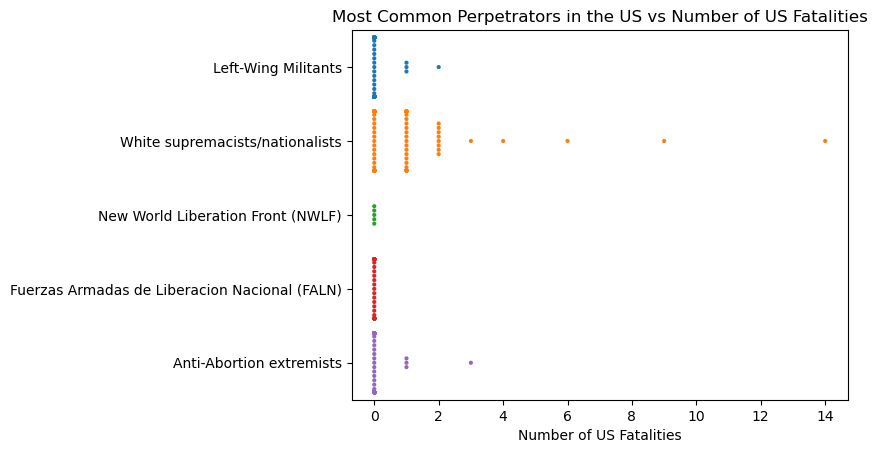

In [121]:
commonGroups = UnitedStatesIncidents['gname'].value_counts().head(6)[1:].index.tolist()
UnitedStatesIncidents[UnitedStatesIncidents['gname'].isin(commonGroups)]

sns.swarmplot(x='nkillus', y='gname', data=UnitedStatesIncidents[UnitedStatesIncidents['gname'].isin(commonGroups)], orient='h', size=3)
plt.title("Most Common Perpetrators in the US vs Number of US Fatalities")
plt.xlabel("Number of US Fatalities")
plt.ylabel(None)
plt.show()

In [150]:
usGroups = pd.pivot_table(UnitedStatesIncidents[(UnitedStatesIncidents['nkillus'] > 0) & (UnitedStatesIncidents['gname'] != "Unknown")], index='gname', values='nkillus', aggfunc=np.sum)
usGroups = usGroups.reindex(usGroups['nkillus'].sort_values(ascending=False).index)
violentGroups = usGroups.head(5).index.tolist()

usGroups.head(10)

,nkillus
gname,
Al-Qaida,2908.0
Anti-Government extremists,186.0
Jihadi-inspired extremists,79.0
White supremacists/nationalists,76.0
Incel extremists,24.0
Black Nationalists,23.0
Anti-Semitic extremists,19.0
Zebra killers,15.0
Anti-Police extremists,13.0


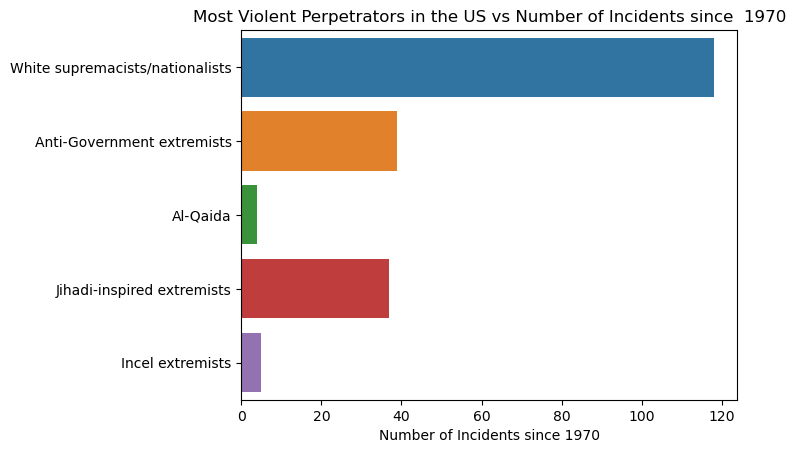

In [163]:


sns.countplot(y='gname', data=UnitedStatesIncidents[UnitedStatesIncidents['gname'].isin(violentGroups)])
plt.title("Most Violent Perpetrators in the US vs Number of Incidents since  1970")
plt.xlabel("Number of Incidents since 1970")
plt.ylabel(None)
plt.show()